# GPU Monitor

In [1]:
#https://developer.nvidia.com/blog/profiling-and-optimizing-deep-neural-networks-with-dlprof-and-pyprof/
#nvidia-smi
#nvidia-smi dmon

## Import Libs

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import cv2
from math import sin, cos, pi
from time import strftime
from datetime import datetime

In [3]:
train_data = pd.read_csv('data/training.csv') 
test_data = pd.read_csv('data/test.csv') 
Id_data = pd.read_csv('data/IdLookupTable.csv') 

# MODEL EXAMPLE
https://www.tensorflow.org/tutorials/images/cnn

In [4]:
from tensorflow import keras
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import random
import tensorflow as tf



In [5]:
epochs = 150
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

#make some random data
reset_random_seeds()

In [6]:
model = Sequential()

#Block 1
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 2
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Block 3
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 4
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 5
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 6
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','accuracy'])

In [8]:
train_data = pd.read_csv('data/training.csv')

images = []
y_train = []

print(len(train_data))
train_data = train_data.fillna(method = 'ffill')
for idx, sample in train_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_train = np.array(images)

7049


In [9]:
training = train_data.drop('Image',axis = 1)

y_train = []
for idx, sample in training.iterrows():
    y = training.iloc[idx,:]
    y_train.append(y)    
y_train = np.array(y_train,dtype = 'float')

In [10]:
start_time = datetime.now()
history = model.fit(X_train,y_train,epochs = epochs,batch_size = 450,validation_split = 0.2)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/150
13/13 [==============================] - 7s 511ms/step - loss: 580.3329 - mae: 17.1080 - accuracy: 0.2625 - val_loss: 1467.5603 - val_mae: 35.7967 - val_accuracy: 0.6816
Epoch 2/150
13/13 [==============================] - 5s 385ms/step - loss: 47.7217 - mae: 5.4430 - accuracy: 0.3325 - val_loss: 513.9916 - val_mae: 21.0221 - val_accuracy: 0.6872
Epoch 3/150
13/13 [==============================] - 5s 392ms/step - loss: 33.2290 - mae: 4.4946 - accuracy: 0.3412 - val_loss: 345.3097 - val_mae: 16.9957 - val_accuracy: 0.6766
Epoch 4/150
13/13 [==============================] - 5s 402ms/step - loss: 28.2029 - mae: 4.1070 - accuracy: 0.3775 - val_loss: 184.2880 - val_mae: 12.4215 - val_accuracy: 0.6184
Epoch 5/150
13/13 [==============================] - 5s 391ms/step - loss: 25.7507 - mae: 3.9211 - accuracy: 0.3939 - val_loss: 139.1663 - val_mae: 10.7348 - val_accuracy: 0.6872
Epoch 6/150
13/13 [==============================] - 5s 385ms/step - loss: 24.5240 - mae: 3.8152 - acc

13/13 [==============================] - 5s 394ms/step - loss: 7.6575 - mae: 2.1117 - accuracy: 0.7255 - val_loss: 10.2672 - val_mae: 2.5556 - val_accuracy: 0.6986
Epoch 46/150
13/13 [==============================] - 5s 388ms/step - loss: 8.8910 - mae: 2.2917 - accuracy: 0.7377 - val_loss: 3.6162 - val_mae: 1.0689 - val_accuracy: 0.7220
Epoch 47/150
13/13 [==============================] - 5s 387ms/step - loss: 7.2176 - mae: 2.0578 - accuracy: 0.7269 - val_loss: 4.3155 - val_mae: 1.2682 - val_accuracy: 0.7191
Epoch 48/150
13/13 [==============================] - 5s 387ms/step - loss: 7.5707 - mae: 2.1124 - accuracy: 0.7383 - val_loss: 7.9880 - val_mae: 2.1384 - val_accuracy: 0.7234
Epoch 49/150
13/13 [==============================] - 5s 389ms/step - loss: 8.6290 - mae: 2.2551 - accuracy: 0.7482 - val_loss: 5.3118 - val_mae: 1.6356 - val_accuracy: 0.7184
Epoch 50/150
13/13 [==============================] - 5s 388ms/step - loss: 7.3355 - mae: 2.0728 - accuracy: 0.7372 - val_loss: 2.98

13/13 [==============================] - 5s 391ms/step - loss: 4.5996 - mae: 1.6376 - accuracy: 0.8198 - val_loss: 2.4200 - val_mae: 0.9042 - val_accuracy: 0.7702
Epoch 92/150
13/13 [==============================] - 5s 391ms/step - loss: 4.6915 - mae: 1.6557 - accuracy: 0.8262 - val_loss: 2.8304 - val_mae: 0.8171 - val_accuracy: 0.7397
Epoch 93/150
13/13 [==============================] - 5s 389ms/step - loss: 4.3752 - mae: 1.5955 - accuracy: 0.8280 - val_loss: 2.7214 - val_mae: 0.8682 - val_accuracy: 0.7801
Epoch 94/150
13/13 [==============================] - 5s 391ms/step - loss: 4.3590 - mae: 1.5872 - accuracy: 0.8253 - val_loss: 3.1242 - val_mae: 1.0557 - val_accuracy: 0.7915
Epoch 95/150
13/13 [==============================] - 5s 403ms/step - loss: 5.6611 - mae: 1.8194 - accuracy: 0.8232 - val_loss: 2.8758 - val_mae: 1.1339 - val_accuracy: 0.7794
Epoch 96/150
13/13 [==============================] - 5s 402ms/step - loss: 4.5616 - mae: 1.6318 - accuracy: 0.8315 - val_loss: 4.145

13/13 [==============================] - 5s 392ms/step - loss: 4.4987 - mae: 1.6077 - accuracy: 0.8555 - val_loss: 3.9648 - val_mae: 1.4570 - val_accuracy: 0.7766
Epoch 138/150
13/13 [==============================] - 5s 397ms/step - loss: 3.9419 - mae: 1.5111 - accuracy: 0.8649 - val_loss: 2.6955 - val_mae: 0.8200 - val_accuracy: 0.7660
Epoch 139/150
13/13 [==============================] - 5s 386ms/step - loss: 3.8419 - mae: 1.4885 - accuracy: 0.8601 - val_loss: 2.3773 - val_mae: 0.7865 - val_accuracy: 0.7950
Epoch 140/150
13/13 [==============================] - 5s 391ms/step - loss: 3.8050 - mae: 1.4729 - accuracy: 0.8635 - val_loss: 6.0970 - val_mae: 1.9933 - val_accuracy: 0.7730
Epoch 141/150
13/13 [==============================] - 5s 390ms/step - loss: 5.7985 - mae: 1.8575 - accuracy: 0.8658 - val_loss: 5.2743 - val_mae: 1.7490 - val_accuracy: 0.7617
Epoch 142/150
13/13 [==============================] - 5s 397ms/step - loss: 6.0789 - mae: 1.8764 - accuracy: 0.8555 - val_loss: 

221/221 - 3s - loss: 1.4214 - mae: 0.7172 - accuracy: 0.8807


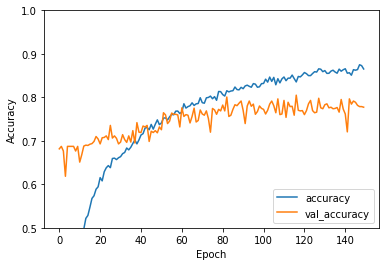

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc, acc = model.evaluate(X_train,y_train, verbose=2)

In [12]:
arc = '6block_2FC'
subname = '{}_epochs_{}_'.format(arc, epochs)
model_name = "data/models/"+subname+strftime("%Y-%m-%d_%H-%M-%S")+".keras"
model.save(model_name)

In [13]:
model_name

'data/models/6block_2FC_epochs_150_2020-12-05_01-17-15.keras'

In [14]:
# model_name = "model_simple_nn_2020-11-13_06-57-10.keras"
model = keras.models.load_model(model_name)

In [15]:
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
images = []

test_data = pd.read_csv('data/test.csv') 
for idx, sample in test_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_predict = np.array(images)

# Make Predictions

In [17]:
Id_data = pd.read_csv('data/IdLookupTable.csv') 

test_preds = model.predict(X_predict)
test_preds[test_preds > 96] = 96

image_id = list(Id_data["ImageId"]-1)
mark_names = list(Id_data['FeatureName'])
mark_id = [mark_names.index(x) for x in mark_names]

req_predictions = [test_preds[x,y] for x,y in zip(image_id,mark_id)]

rowid = pd.Series(Id_data['RowId'], name = 'RowId')
loc = pd.Series(req_predictions, name = 'Location')
submission = pd.concat([rowid, loc], axis = 1)
submission.to_csv('data/{}submission.csv'.format(subname),index = False)

In [18]:
'data/{}submission.csv'.format(subname)

'data/6block_2FC_epochs_150_submission.csv'